<a href="https://colab.research.google.com/github/OTD-Aregbesola/Salary_Predictions/blob/main/Salary_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Salary

In [53]:
# import linrary needed for our data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.correlation import plot_corr



In [59]:
# import the dataset
df = pd.read_csv('Salary_dataset.csv')

# Data Wrangling

Exploring the data to have more insight on the data


In [23]:
# viewing the first 5 rows of our code
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [25]:
df.nunique()

,0
Unnamed: 0,30
YearsExperience,28
Salary,30


In [26]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


#Data Cleaning


1. The columns are not following the PEP 8 guideline
2. The unknow Column has to be dropped in order to stop our model from overfitting

In [60]:
df.drop('Unnamed: 0', axis=1, inplace=True)



In [27]:
df.rename(columns = {'YearsExperience' : 'experience', 'Salary' : 'salary'}, inplace= True)

df.head()


,Unnamed: 0,experience,salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [31]:
df.head()

,experience,salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Exploratory Analysis

In this section we;

1. Check for normalities
2. check for linearity

This 2 are paramount in other to create the model

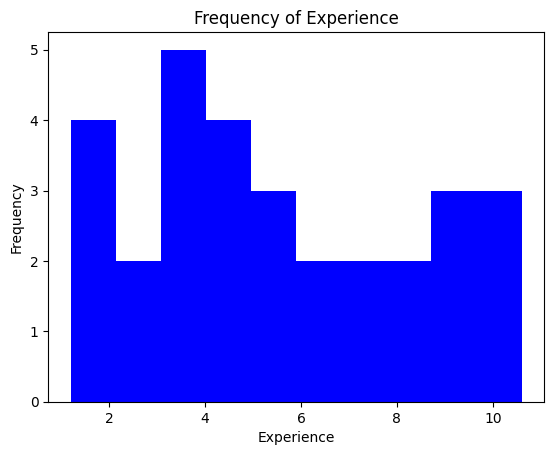

In [33]:
plt.hist(df['experience'], color='blue')

plt.title('Frequency of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()


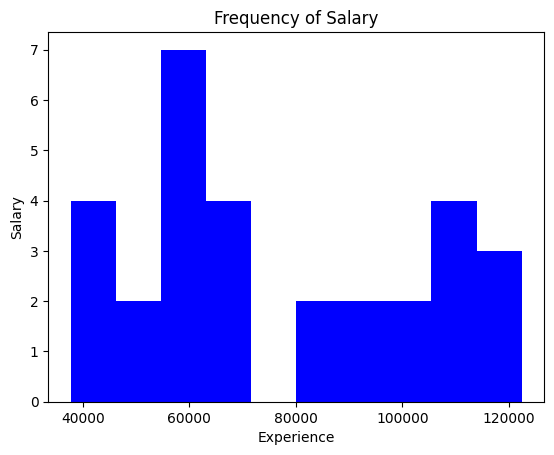

In [34]:
plt.hist(df['salary'], color='blue')

plt.title('Frequency of Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Model Building

In [35]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['experience', 'salary'], dtype='object')


In [36]:
df.corr()

,experience,salary
experience,1.000000,0.978242
salary,0.978242,1.000000


There is a strong correlation between our Independent Variable (Experience) and dependent variable (Salary)

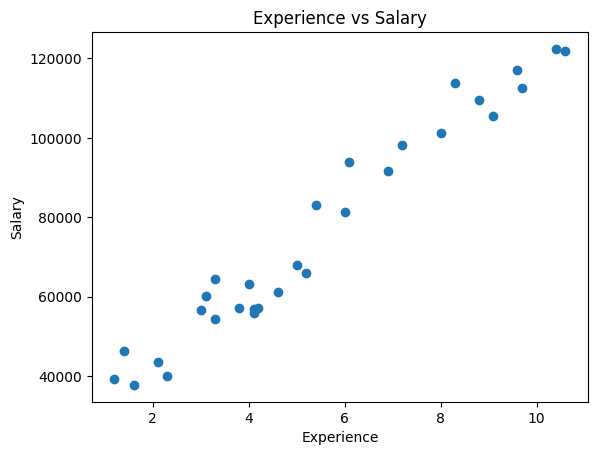

In [39]:
plt.scatter(df['experience'], df['salary'])

plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

This show that there's a relationship between Experience and Salary, because as one variable increase the other also increases

In [41]:
y=df['salary']
X=df.drop('salary', axis=1)
print("shape of x", X.shape)
print("shape of y", y.shape)

shape of x (30, 1)
shape of y (30,)


In [61]:
# Testing and Training model
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
lm = LinearRegression()

In [47]:
model = lm.fit(x_train,y_train)

In [54]:
Predictions = model.predict(x_test)
print(Predictions)

[115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]


In [55]:
R2 = r2_score(y_test,Predictions)
MSE = mean_squared_error(y_test, Predictions)
MAE = mean_absolute_error(y_test, Predictions)
RMSE = np.sqrt(MSE)

print( 'R2 :', R2)
print( 'MSE :', MSE)
print( 'MAE :', MAE)
print( 'RMSE :', RMSE)

R2 : 0.9024461774180497
MSE : 49830096.855908394
MAE : 6286.453830757745
RMSE : 7059.04362190151


This indicates that approximately 90.24% of the variation in salaries can be explained by the years of experience, showing a strong relationship between the predictor and the target variable.

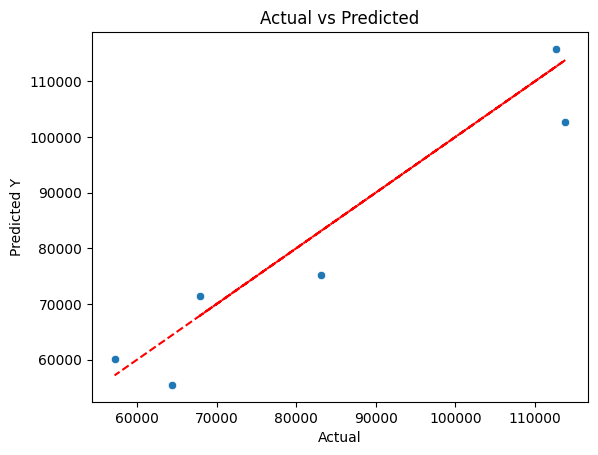

In [58]:
sns.scatterplot(x=y_test, y=Predictions)
plt.plot(y_test, y_test, color='red', linestyle = "--" )
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted Y')
plt.show()